In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [3]:
df = pd.read_csv("FuelConsumptionCo2.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


This dataset is about 2014. For more years, go to 
https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64

In [4]:
#statistics about this dataset
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [6]:
#select four features to work with
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


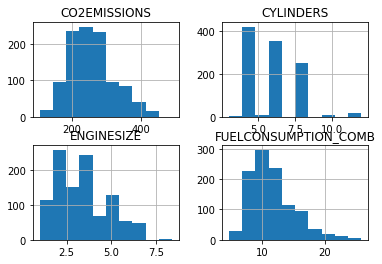

In [7]:
#visualization of these features
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

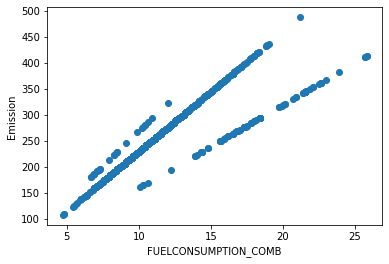

In [10]:
#fuel_consumption_comb v.s CO2 emissions
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS)
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

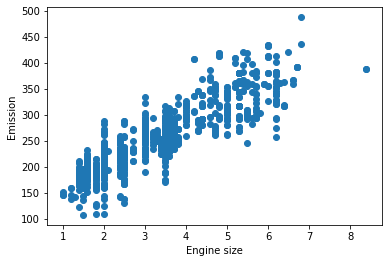

In [11]:
#engine_size v.s CO2 emissions
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS)
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

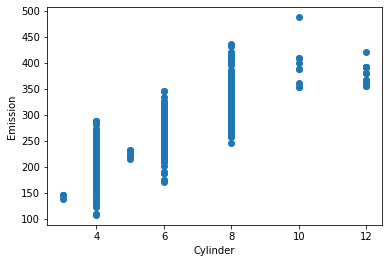

In [12]:
#cylinders v.s emissions
plt.scatter(cdf.CYLINDERS,cdf.CO2EMISSIONS)
plt.xlabel("Cylinder")
plt.ylabel("Emission")
plt.show()

After the explorartory analysis on this dataset, we begin doing simple linear regression to predict the CO2 emission given some features about this vehicle.

In [13]:
# we want to do a train/test split to make sure better evaluation on out-of-sample accuracy
#here we randomly select 80% of data to train and 20% to test model
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [15]:
# Now we want to train the model with engine size as independent var and emissions as dependent var
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (train_x, train_y)
# print the coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[39.24904324]]
Intercept:  [124.91165931]


Text(0, 0.5, 'Emission')

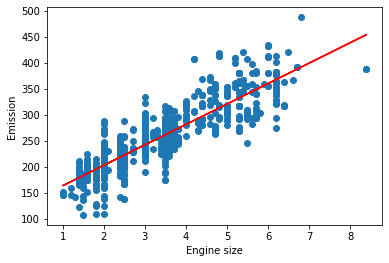

In [19]:
#plot the result 
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS)
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0],'-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [20]:
# evaluate the trained model
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 22.79
Residual sum of squares (MSE): 941.84
R2-score: 0.77


Now we want to do multiple linear regression.

In [25]:
# re-select features again
cdf1 = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
msk = np.random.rand(len(df)) < 0.8
train = cdf1[msk]
test = cdf1[~msk]

In [27]:
# first we use engine_size, cylinders, fuel_consumption_comb to train model

# train the model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (x, y)
# print the coefficients
print ('Coefficients: ', regr.coef_)

# prediction
y_hat= regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print("Residual sum of squares: %.2f"% np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Coefficients:  [[11.06141444  7.31094323  9.71775397]]
Residual sum of squares: 519.25
Variance score: 0.86


In [28]:
# Then we use engine_size, cylinders, fuel_consumption_city and fuel_consumption_hwy to train model

# train the model
regr1=linear_model.LinearRegression()
x1=np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
y1=np.asanyarray(train[['CO2EMISSIONS']])
regr1.fit(x1,y1)
# print the coefficients
print ('Coefficients: ', regr1.coef_)

# prediction
y1_hat=regr1.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
x1=np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
y1=np.asanyarray(test[['CO2EMISSIONS']])
print("Residual sum of squares: %.2f"% np.mean((y1_hat-y1)**2))

# Explained variance score: 1 is perfect prediction
print("Variance score: %.2f"%regr1.score(x1,y1))

Coefficients:  [[11.17115038  6.90668295  6.29041009  3.13378008]]
Residual sum of squares: 521.34
Variance score: 0.86


We found that both multiple linear regression models have the similar performance.
And it is clear that the multiple linear regression models do better than the simple linear regression models.

Next, we are going to use Polynomial Regression Model with degree 2 and 3 to see if they have better performance.

In [29]:
# use the cdf used for simple linear regression model
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


In [30]:
#split train/test data
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [31]:
#prepare data for training and testing

from sklearn import linear_model
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

In [32]:
from sklearn.preprocessing import PolynomialFeatures
# first try quadratic model
poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  2.4 ,  5.76],
       [ 1.  ,  1.5 ,  2.25],
       ...,
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.2 , 10.24]])

Coefficients:  [[ 0.         50.51330332 -1.53135452]]
Intercept:  [107.87009505]
Mean absolute error: 23.91
Residual sum of squares (MSE): 1018.12
R2-score: 0.65


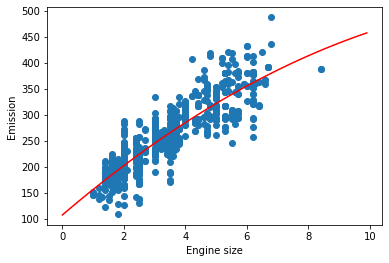

In [38]:
# train the model at deg=2
from sklearn import linear_model
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
# print the coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

# plot the model
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS)
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")

# evaluation
from sklearn.metrics import r2_score
test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 23.89
Residual sum of squares (MSE): 1014.88
R2-score: 0.66


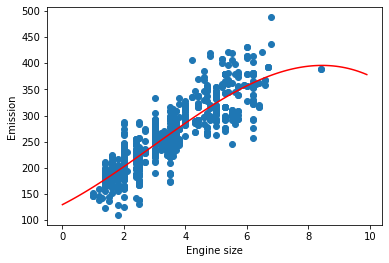

In [39]:
# redo at degree=3
poly_3=PolynomialFeatures(degree=3)
train_x_poly_3=poly_3.fit_transform(train_x)
clf_3=linear_model.LinearRegression()
train_y_3=clf_3.fit(train_x_poly_3,train_y)

# plot the model
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS)
XX = np.arange(0.0, 10.0, 0.1)
yy = clf_3.intercept_[0]+ clf_3.coef_[0][1]*XX+ clf_3.coef_[0][2]*np.power(XX, 2)+clf_3.coef_[0][3]*np.power(XX,3)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")

# evaluation
test_x_poly_3 = poly_3.fit_transform(test_x)
test_y_3 = clf_3.predict(test_x_poly_3)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_3 - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_3 - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_3 , test_y) )

We found that the performance of Polynomial Regression models perform less satisfying compared to the multiple linear regression model before.